First, we begin by taking in the dataset and cleaning it up for text mining and sentiment analysis. We will also create a new csv file with the clean data.

In [1]:
# Dataset source: https://jmcauley.ucsd.edu/data/amazon/
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer()
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#Json structure
'''
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
vote - helpful votes of the review
style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)
image - images that users post after they have received the product
'''

'\nreviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B\nasin - ID of the product, e.g. 0000013714\nreviewerName - name of the reviewer\nvote - helpful votes of the review\nstyle - a disctionary of the product metadata, e.g., "Format" is "Hardcover"\nreviewText - text of the review\noverall - rating of the product\nsummary - summary of the review\nunixReviewTime - time of the review (unix time)\nreviewTime - time of the review (raw)\nimage - images that users post after they have received the product\n'

In [3]:
df = pd.read_json('Movies_and_TV_5.json', lines=True)
df = df.drop(columns=['verified','reviewTime','reviewerID','asin','vote','unixReviewTime','asin','reviewerName'])

df = df[df['reviewText'].str.split().str.len().gt(5)] # Reviews must have greater than 5 words to perform sentiment analysis

# Convert reviews to all lowercase
def to_lower(text):
    return text.lower()
df.reviewText = df.reviewText.apply(to_lower)

# Remove special characters from reviews
def remove_special_char(text):
    newString = ''
    for i in text:
        if i.isalnum():                     # If character is alphanumeric, keep. Else, add a space
            newString = newString + i
        else:
            newString = newString + ' '
    return newString

df.reviewText = df.reviewText.apply(remove_special_char)

# Remove stopwords: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    newStr = ""
    for w in words : 
        if w not in stop_words :
            newStr += w + " "
    #return [w for w in words if w not in stop_words]
    return newStr
df.reviewText = df.reviewText.apply(rem_stopwords)
# End of data cleaning, clean data set
df.to_csv("clean_data.csv")
df


,overall,style,reviewText,summary
0,5,{'Format:': ' DVD'},watch learn ended state dying country,Excellent Viewing
3,5,{'Format:': ' DVD'},great read much historical info thank,A great read. So much historical info
5,5,{'Format:': ' VHS Tape'},well done video important information american...,Americans should see this.
6,2,{'Format:': ' VHS Tape'},lot information piece coming faster freight tr...,Lots of Info. But Mostly a Right-Wing Agenda P...
7,5,{'Format:': ' DVD'},essential message told society today people cl...,This should be esential reading for everyone i...
...,...,...,...,...
626,1,NaN,taste strictly porn cheaply produced,One Star
627,1,{'Format:': ' DVD'},nothing even remotely scary werewolf overalls ...,YIKES!!
628,1,{'Format:': ' DVD'},bad 3 short story stupid please waste money ti...,One Star
630,1,{'Format:': ' Prime Video'},wanted show parts film high school english cla...,Do not buy this.


In [4]:
# Use overall to classify as positive or negative: 3+ is positive, 1 and 2 are negative
# reviewText is full review, will use for sentiment analysis
# Summary might be useful for EDA? Length of summary with score maybe?
# Style also for EDA

Now, we will perform EDA to better understand our data and find interesting information about our dataset.

<Axes: >

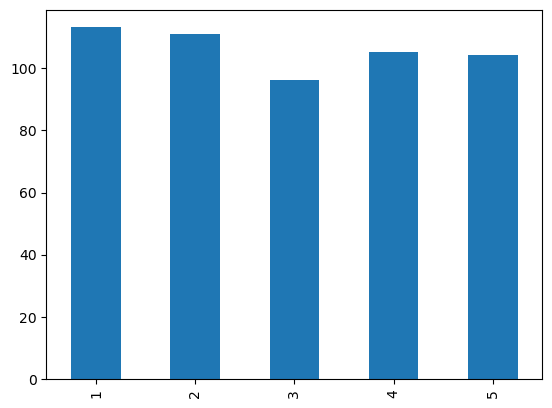

In [5]:
# EDA
pdf = df['overall'].value_counts()
pdf = pdf.reindex(sorted(pdf.index), axis = 1)
pdf.plot.bar()

<Axes: ylabel='style'>

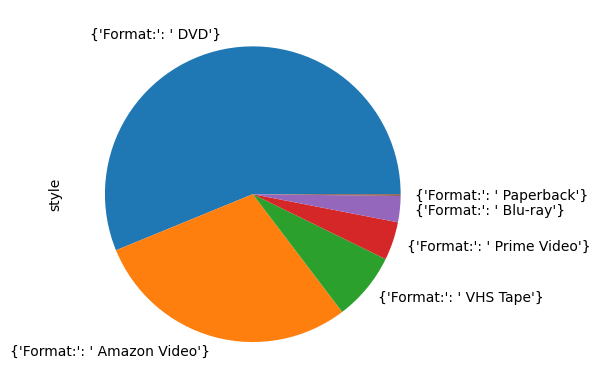

In [68]:
format_df = df['style'].value_counts()
format_df.plot.pie()

In [6]:
vectorizer.fit(df['reviewText'])
names = vectorizer.get_feature_names_out()
bag_of_words = vectorizer.fit(df['reviewText'])
bag_of_words = vectorizer.transform(df['reviewText'])

In [8]:
print(bag_of_words[0])

  (0, 1361)	1
  (0, 1850)	1
  (0, 1961)	1
  (0, 3296)	1
  (0, 5383)	1
  (0, 6182)	1


In [9]:
vectorizer.vocabulary_.get("learn")

3296

In [10]:
names[3296]

'learn'

In [11]:
tfidfVect = TfidfVectorizer()

In [12]:
tfidf = tfidfVect.fit(df['reviewText'])
tfidf = tfidfVect.transform(df['reviewText'])

In [13]:
print(tfidf[2])

  (0, 6215)	0.24551129359280968
  (0, 6084)	0.3055654059761589
  (0, 3221)	0.28833106327293073
  (0, 2977)	0.48010892906449415
  (0, 2910)	0.42357593350699946
  (0, 1758)	0.3157736959368348
  (0, 325)	0.5035722421674187


In [14]:
tfidfVect.vocabulary_.get("great")

2592

In [15]:
names[325]

'americans'